In [19]:
import pandas as pd
import numpy as np
import pickle


import sys
sys.path.insert(0, "../src")
sys.path.insert(0, "../")
import shutil
from d2v_recommender import *
from config import config

from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import roc_auc

import sklearn

In [20]:
d2v = D2V_Recommender()
data_dict = d2v.load_data_dict(config.data_dict_path)

In [21]:
data_dict["X_train"].shape, data_dict["y_train"].shape, data_dict["X_test"].shape, data_dict["y_test"].shape

((34020, 50), (34020,), (3789, 50), (3789,))

In [22]:
X_train = data_dict["X_train"]
X_test = data_dict["X_test"]
y_train = data_dict["y_train"]
y_test = data_dict["y_test"]

In [45]:
# Auto-ML

shutil.rmtree(config.output_automl_path, ignore_errors=True)
shutil.rmtree(config.tmp_automl_path, ignore_errors=True)
automl = AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=60,
    tmp_folder=config.tmp_automl_path,  # automated
    output_folder=config.output_automl_path,
    metric=roc_auc
)

automl.fit(X_train, 
            y_train,
            dataset_name='d2v_small')

############################################################################
# Print the final ensemble constructed by auto-sklearn
# ====================================================

print(automl.show_models())

[WARNING] [2020-12-29 21:36:27,609:AutoML(1):d2v_small] Capping the per_run_time_limit to 58.0 to have time for a least 2 models in each process.


KeyboardInterrupt: 

In [ ]:
# automl.score(X_test, y_test)
automl.cv_results_

In [ ]:
from sklearn.metrics import *

###########################################################################
# Get the Score of the final ensemble
# ===================================

predictions = automl.predict(X_test)
proba = automl.predict_proba(X_test)


print("Accuracy score:", accuracy_score(y_test, predictions))
print("MCC:", matthews_corrcoef(y_test, predictions))

In [ ]:
# Add to the recommender
recommender.set_classifier(automl)
# predict
recommender.predict(1,133)

In [ ]:
# # TODO
# def automl_binary_classifier(x):
#     return automl.predict_proba(x)[0][0]
# sklearn.metrics.plot_roc_curve(automl_binary_classifier, X_test, y_test)

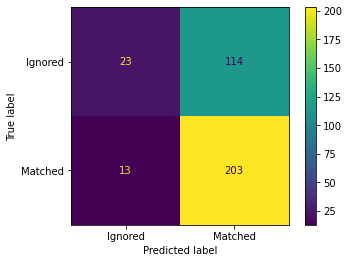

In [47]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Ignored","Matched"])
disp.plot()